# Interesting insights into Indian Premier League matches (2008–2024)

The Indian Premier League (IPL) is a professional Twenty20 (T20) cricket league in India, established by the Board of Control for Cricket in India (BCCI) in 2007. It has quickly become one of the most popular and lucrative cricket leagues in the world. The IPL features franchises representing different cities in India. The number of teams has varied over the years, but as of 2024, there are ten teams. The IPL attracts millions of viewers worldwide, with its matches being broadcast in numerous countries and available for streaming online. The value of IPL as a business grew by 6.5 per cent to $16.4 billion (₹1,35,000 crore) in 2024, as per a report released by investment bank Houlihan Lokey, Inc. on Wednesday.

# Objectives:


*   To find the team that won the most number of matches in a season.

*   To find the team that lost the most number of matches in a season.
*   Does winning toss increases the chances of victory.
*   To find the player with the most player of the match awards.
*   To find the city that hosted the maximum number of IPL matches.

*   To find the most winning team for each season.
*   To find the on-field umpire with the maximum number of IPL matches.

*   To find the biggest victories in IPL while defending a total and while chasing a total.















# Data Preparation and Cleaning
Let’s start by reading the csv file to Pandas DataFrame.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
ipl_matches_df = pd.read_csv('/content/matches.csv')

In [2]:
ipl_matches_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [3]:
ipl_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

So there are 1095 rows and 20 columns. 1095 rows imply that there were 1095 IPL matches held between 2008 and 2024.




In [4]:
ipl_matches_df['result'].count()

1095

To see whether toss result had any impact on the match result, let's make new columns as 'win_by_runs' and 'win_by_wickets'.

In [5]:
ipl_matches_df['win_by_runs'] = 0
ipl_matches_df['win_by_wickets'] = 0

# Populate the new columns based on conditions
ipl_matches_df.loc[ipl_matches_df['result'] == 'runs', 'win_by_runs'] = ipl_matches_df['result_margin']
ipl_matches_df.loc[ipl_matches_df['result'] == 'wickets', 'win_by_wickets'] = ipl_matches_df['result_margin']
ipl_matches_df.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,win_by_runs,win_by_wickets
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,140,0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,33,0
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,0,9
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,0,5
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,0,5


In [61]:
max(ipl_matches_df['win_by_runs'])

146

In [62]:
max(ipl_matches_df['win_by_wickets'])

10

In [6]:
ipl_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [7]:
ipl_matches_df.describe()

,id,result_margin,target_runs,target_overs,win_by_runs,win_by_wickets
count,1.095000e+03,1076.000000,1092.000000,1092.000000,1095.000000,1095.000000
mean,9.048283e+05,17.259294,165.684066,19.759341,13.691324,3.268493
std,3.677402e+05,21.787444,33.427048,1.581108,23.446810,3.370626
min,3.359820e+05,1.000000,43.000000,5.000000,0.000000,0.000000
25%,5.483315e+05,6.000000,146.000000,20.000000,0.000000,0.000000
50%,9.809610e+05,8.000000,166.000000,20.000000,0.000000,3.000000
75%,1.254062e+06,20.000000,187.000000,20.000000,19.000000,6.000000
max,1.426312e+06,146.000000,288.000000,20.000000,146.000000,10.000000


# Observations:
The following inferences can be made from the describe() method:


*   The .csv file has data of IPL matches starting from the season 2008 to 2024.
*   The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.
* The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.
* 75% of the victorious teams that bat first won by a margin of 19 runs.
* 75% of the victorious teams that bat second won by a margin of 6 wickets.
* There were 1076 IPL matches hosted from 2008 to 2024.

In [8]:
ipl_matches_df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'win_by_runs', 'win_by_wickets'],
      dtype='object')

Let’s view the unique values of each column to help us understand the dataset better.

In [9]:
for col in ipl_matches_df:
    print(ipl_matches_df[col].unique())

[ 335982  335983  335984 ... 1426310 1426311 1426312]
['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019' '2020/21' '2021' '2022' '2023' '2024']
['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah'
 'Navi Mumbai' 'Lucknow' 'Guwahati' 'Mohali']
['2008-04-18' '2008-04-19' '2008-04-20' '2008-04-21' '2008-04-22'
 '2008-04-23' '2008-04-24' '2008-04-25' '2008-04-26' '2008-04-27'
 '2008-04-28' '2008-04-29' '2008-04-30' '2008-05-01' '2008-05-02'
 '2008-05-03' '2008-05-04' '2008-05-05' '2008-05-06' '2008-05-07'
 '2008-05-08' '2008-05-09' '2008-05-10' '2008-05-11' '2008-05-12'
 '2008-05-13' '2008-05-14' '2008-05-15' '2008-05-16' '2008-05-17'
 '2008-05-18'

The dataset has 22 columns. Let’s get acquainted with the columns.

* id: The IPL match id.
* season: The IPL season
* city: The city where the IPL match was held.
* date: The date on which the match was held.
* match_type: Whether it was a league match or a knock-out match.
* player_of_match: The outstanding player of the match.
* venue: The venue where the match was hosted.
* team1: One of the teams of the IPL match
* team2: The other team of the IPL match
* toss_winner: The team that won the toss
* toss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’
* winner: The winner of the match.
* result: The result(‘runs’, ‘wickets’) of the match, i.e whether the team won by wickets or by runs.
* result_margin: Runs( by how many runs did the team win) or wickets( by how many wickets did the team win)
* target_runs: The runs that the chasing team need to score in order to win the match.
* target_overs: The numbers of overs that the defending team will bowl to defend their score.
* super_over: Whether the match had super over or not.
* method: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.
* umpire1: One of the two on-field umpires who officiate the match.
* umpire2: One of the two on-field umpires who officiate the match.
* win_by_runs: Provides the runs by which the team batting first won
* win_by_wickets: Provides the number of wickets by which the team batting second won.



In [10]:
#the first index that doesn't contain a NaN value
ipl_matches_df.method.first_valid_index()

38

In [11]:
ipl_matches_df.loc[38:50]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,win_by_runs,win_by_wickets
38,336022,2007/08,Delhi,2008-05-17,League,DPMD Jayawardene,Feroz Shah Kotla,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,...,runs,6.0,89.0,8.0,N,D/L,AV Jayaprakash,RE Koertzen,6,0
39,336023,2007/08,Jaipur,2008-05-17,League,GC Smith,Sawai Mansingh Stadium,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,...,runs,65.0,198.0,20.0,N,NaN,BF Bowden,SL Shastri,65,0
40,336024,2007/08,Hyderabad,2008-05-18,League,DJ Bravo,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Mumbai Indians,Deccan Chargers,...,runs,25.0,179.0,20.0,N,NaN,BR Doctrove,DJ Harper,25,0
41,336025,2007/08,Kolkata,2008-05-18,League,M Ntini,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,...,runs,3.0,53.0,8.0,N,D/L,Asad Rauf,K Hariharan,3,0
42,336026,2007/08,Bangalore,2008-05-19,League,SP Goswami,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils,...,wickets,5.0,155.0,20.0,N,NaN,SJ Davis,GA Pratapkumar,0,5
43,336027,2007/08,Kolkata,2008-05-20,League,YK Pathan,Eden Gardens,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,...,wickets,6.0,148.0,20.0,N,NaN,BG Jerling,RE Koertzen,0,6
44,336028,2007/08,Mumbai,2008-05-21,League,SE Marsh,Wankhede Stadium,Mumbai Indians,Kings XI Punjab,Mumbai Indians,...,runs,1.0,190.0,20.0,N,NaN,BF Bowden,GA Pratapkumar,1,0
45,336029,2007/08,Chennai,2008-05-21,League,A Kumble,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,...,runs,14.0,127.0,20.0,N,NaN,DJ Harper,I Shivram,14,0
46,336031,2007/08,Chandigarh,2008-05-23,League,SE Marsh,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Deccan Chargers,Kings XI Punjab,...,wickets,6.0,176.0,20.0,N,NaN,Asad Rauf,SJ Davis,0,6
47,336032,2007/08,Delhi,2008-05-24,League,KD Karthik,Feroz Shah Kotla,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,...,wickets,5.0,177.0,20.0,N,NaN,BF Bowden,K Hariharan,0,5


Now, let's drop the columns of result and reult_margin as we have used these features to create our new features.

In [12]:
ipl_matches_df = ipl_matches_df.drop(['result', 'result_margin'], axis = 1)

In the method column there are a lot of NaN values, that might be because it has taken Nan values for all the matches which was not played using D/L rule, so we are going to drop that column as it does not play much importance.

In [13]:
ipl_matches_df = ipl_matches_df.drop(['method'], axis = 1)

In [14]:
ipl_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  target_runs      1092 non-null   float64
 13  target_overs     1092 non-null   float64
 14  super_over       1095 non-null   object 
 15  umpire1          1095 non-null   object 
 16  umpire2          1095 non-null   object 
 17  win_by_runs   

It’s imperative to know the count of NaN values for each column before we proceed further.

In [15]:
ipl_matches_df.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


## Exploratory Analysis and Visualization

Now that our data set has been cleaned up, it’s time to do the in-depth analysis and visualization.

Let’s begin by importing matplotlib,pyplot, and seaborn.

In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### The team with the most number of wins per season.

Each IPL season has a fair share of excitement and adulation.
Let’s analyze the team with the most wins in each season.

Because we have the season column as object datatype, we will convert it into integer type. We will also do these following transformations in the season column.

In [17]:
ipl_matches_df['season'] = ipl_matches_df['season'].apply(lambda x: 2008 if x == '2007/08' else x)

In [18]:
ipl_matches_df['season'] = ipl_matches_df['season'].apply(lambda x: 2010 if x == '2009/10' else x)

In [19]:
ipl_matches_df['season'] = ipl_matches_df['season'].apply(lambda x: 2021 if x == '2020/21' else x)

In [20]:
ipl_matches_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,target_runs,target_overs,super_over,umpire1,umpire2,win_by_runs,win_by_wickets
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,223.0,20.0,N,Asad Rauf,RE Koertzen,140,0
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,241.0,20.0,N,MR Benson,SL Shastri,33,0
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,130.0,20.0,N,Aleem Dar,GA Pratapkumar,0,9
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,166.0,20.0,N,SJ Davis,DJ Harper,0,5
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,111.0,20.0,N,BF Bowden,K Hariharan,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,215.0,20.0,N,Nitin Menon,VK Sharma,0,4
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,160.0,20.0,N,AK Chaudhary,R Pandit,0,8
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,173.0,20.0,N,KN Ananthapadmanabhan,MV Saidharshan Kumar,0,4
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,176.0,20.0,N,Nitin Menon,VK Sharma,36,0


In [21]:
ipl_matches_df['season'] = ipl_matches_df['season'].astype(int)

In [22]:
ipl_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  target_runs      1092 non-null   float64
 13  target_overs     1092 non-null   float64
 14  super_over       1095 non-null   object 
 15  umpire1          1095 non-null   object 
 16  umpire2          1095 non-null   object 
 17  win_by_runs   

In [23]:
teams_per_season = ipl_matches_df.groupby('season')['winner'].value_counts()
teams_per_season

season  winner             
2008    Rajasthan Royals       13
        Kings XI Punjab        10
        Chennai Super Kings     9
        Delhi Daredevils        7
        Mumbai Indians          7
                               ..
2024    Chennai Super Kings     7
        Delhi Capitals          7
        Gujarat Titans          5
        Punjab Kings            5
        Mumbai Indians          4
Name: count, Length: 139, dtype: int64

In [24]:
import pandas as pd

win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for year in ipl_matches_df['season'].unique():
    # Filter the DataFrame for the current year
    season_df = ipl_matches_df[ipl_matches_df['season'] == year]
    # Count the wins for each team in the current year
    wins_count = season_df['winner'].value_counts()
    # Get the team with the maximum wins
    top_team = wins_count.index[0]
    top_wins = wins_count.iloc[0]
    # Create a DataFrame for the top team and append it to the result DataFrame
    win_series = pd.DataFrame({
        'year': [year],
        'team': [top_team],
        'wins': [top_wins]
    })
    win_per_season_df = pd.concat([win_per_season_df, win_series], ignore_index=True)

print(win_per_season_df)

    year                   team wins
0   2008       Rajasthan Royals   13
1   2009       Delhi Daredevils   10
2   2010         Mumbai Indians   11
3   2011    Chennai Super Kings   11
4   2012  Kolkata Knight Riders   12
5   2013         Mumbai Indians   13
6   2014        Kings XI Punjab   12
7   2015    Chennai Super Kings   10
8   2016    Sunrisers Hyderabad   11
9   2017         Mumbai Indians   12
10  2018    Chennai Super Kings   11
11  2019         Mumbai Indians   11
12  2021         Delhi Capitals   19
13  2022         Gujarat Titans   12
14  2023         Gujarat Titans   11
15  2024  Kolkata Knight Riders   11


In [25]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
1,2009,Delhi Daredevils,10
2,2010,Mumbai Indians,11
3,2011,Chennai Super Kings,11
4,2012,Kolkata Knight Riders,12
5,2013,Mumbai Indians,13
6,2014,Kings XI Punjab,12
7,2015,Chennai Super Kings,10
8,2016,Sunrisers Hyderabad,11
9,2017,Mumbai Indians,12


The number of wins is a discrete value. Hence, we will plot a bar chart(barplot in Seaborn).

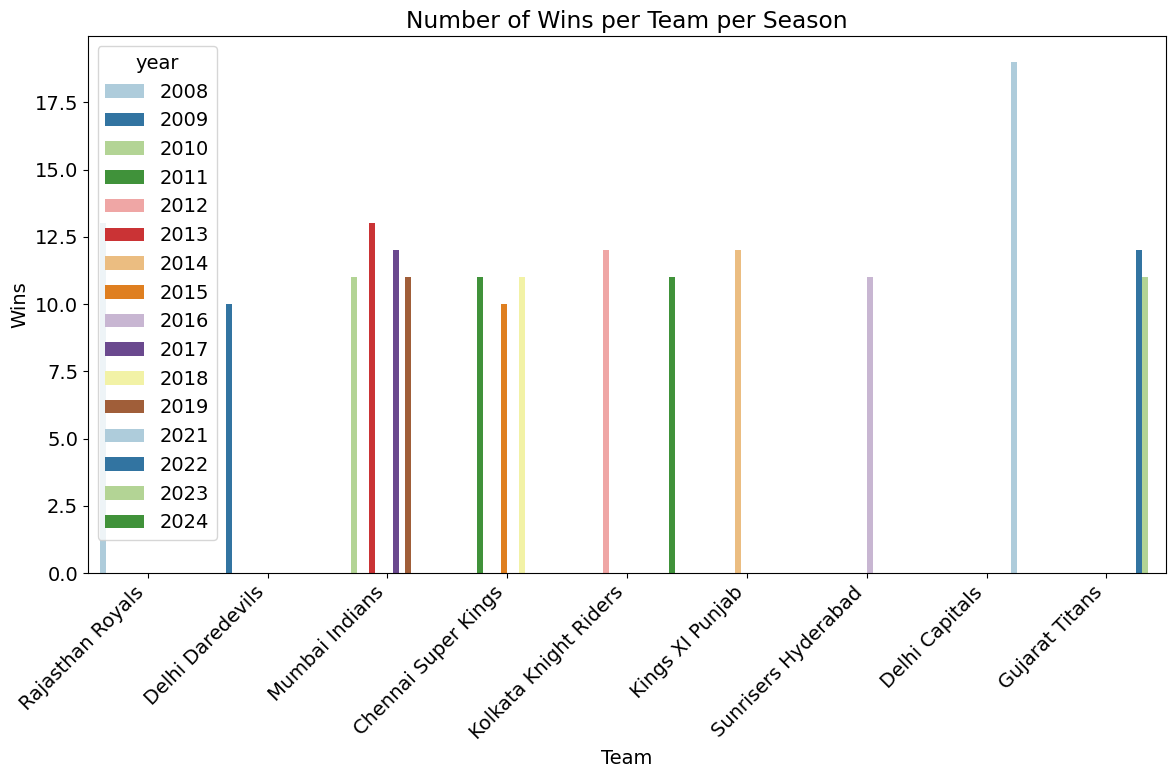

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'win_per_season_df' is already defined as in your provided code

plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.barplot(x='team', y='wins', hue='year', data=win_per_season_df, palette='Paired')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title("Number of Wins per Team per Season")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

From the barplot, we can easily make inferences regarding the year in which a particular team has scored the maximum wins(and also the number of wins).

### Observations:

* Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).

### The team that has won the maximum number of matches till date

<Axes: xlabel='count', ylabel='winner'>

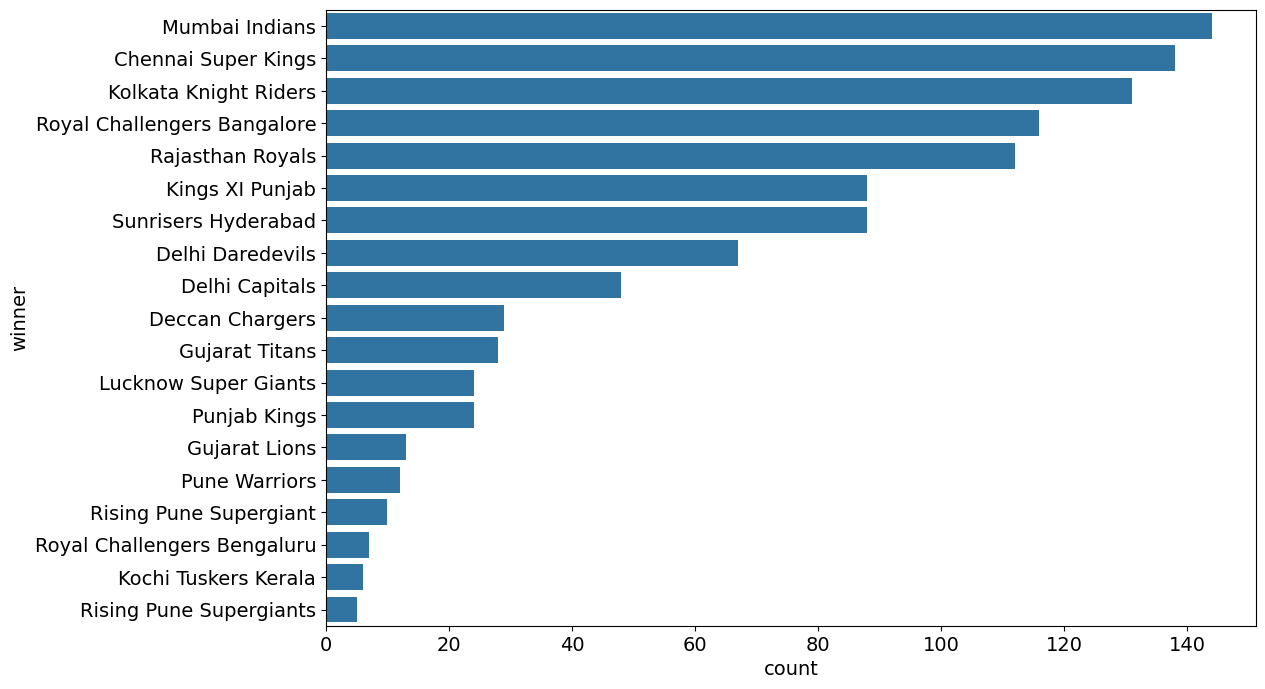

In [20]:
max_wins = ipl_matches_df.winner.value_counts()
sns.barplot(y = max_wins.index, x = max_wins)

In [21]:
print(max_wins)

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Lucknow Super Giants            24
Punjab Kings                    24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


Here, again we can observe that Mumbai Indians have secured the most wins. It is safe to say that MI is the most successful team in IPL.

### The venue that hosted the maximum number of matches

In [28]:
venue_ser = ipl_matches_df['venue'].value_counts()

In [29]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.items():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = pd.concat([venue_df, temp_df], ignore_index=True) # Use concat instead of append

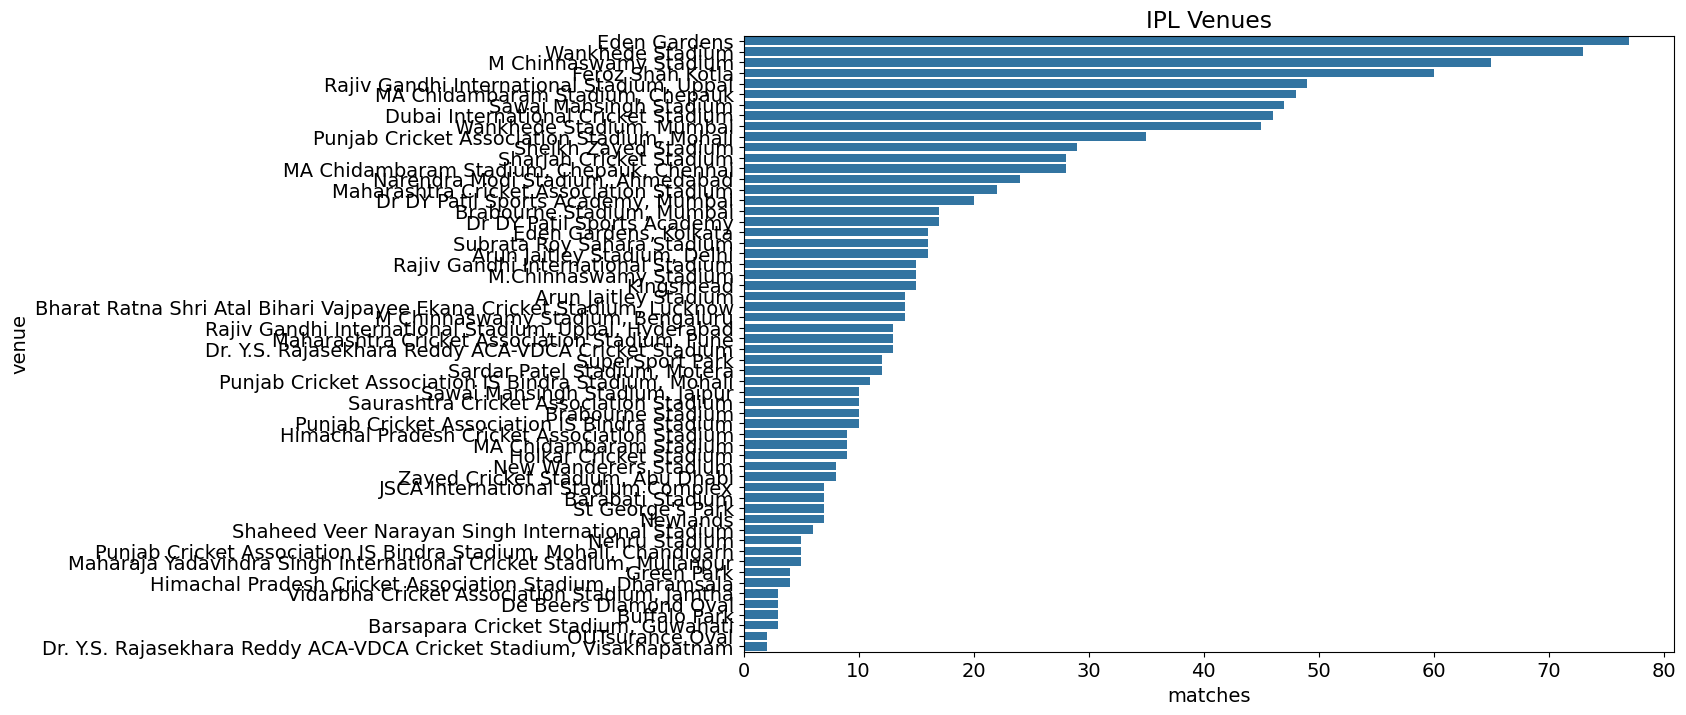

In [30]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

In [31]:
venue_df

,venue,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,65
3,Feroz Shah Kotla,60
4,"Rajiv Gandhi International Stadium, Uppal",49
5,"MA Chidambaram Stadium, Chepauk",48
6,Sawai Mansingh Stadium,47
7,Dubai International Cricket Stadium,46
8,"Wankhede Stadium, Mumbai",45
9,"Punjab Cricket Association Stadium, Mohali",35


### Observations:

* Eden Gardens has hosted the maximum number of IPL matches followed by Wankhede Stadium and M Chinnaswamy Stadium.
* Till 2024, IPL matches were hosted by 57 venues.

### The most successful IPL team

In a game of sports, every team competes for victory. Hence, the team that has registered the most number of victories is the most successful.


In [33]:
team_wins_ser = ipl_matches_df['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.items():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = pd.concat([team_wins_df, temp_df1], ignore_index=True) # Use concat instead of append

In [34]:
team_wins_df

,team,wins
0,Mumbai Indians,144
1,Chennai Super Kings,138
2,Kolkata Knight Riders,131
3,Royal Challengers Bangalore,116
4,Rajasthan Royals,112
5,Kings XI Punjab,88
6,Sunrisers Hyderabad,88
7,Delhi Daredevils,67
8,Delhi Capitals,48
9,Deccan Chargers,29


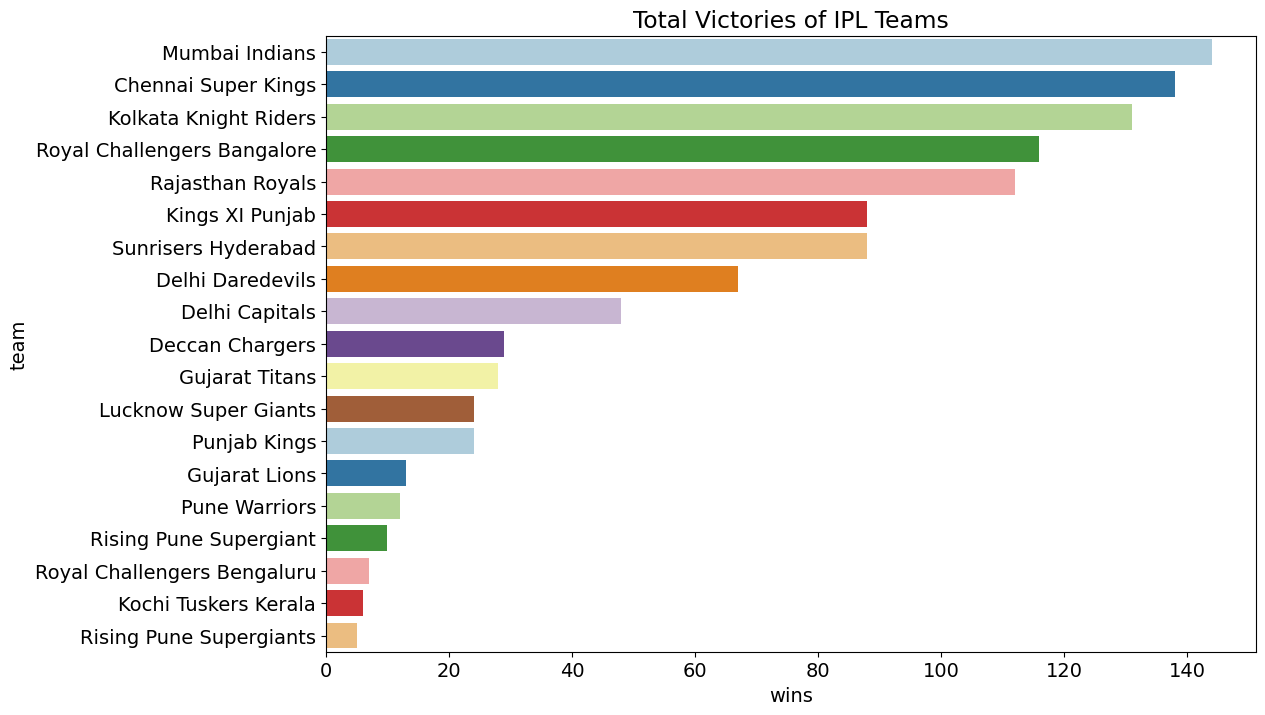

In [35]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');

### Observations:

* Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -144) followed by Chennai Super Kings and Kolkata Knight Riders.

## Most Valuable Player
Winning matters the most in a competitive league match. If a player makes the most significant contribution to his team’s victory, then he’s chosen as the player_of_match. The player who has won the player_of_match title on most occasions is the most valuable player.

In [36]:
mvp_ser = ipl_matches_df['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.items():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = pd.concat([mvp_ten_df, temp_df2], ignore_index=True) # Use concat instead of append
        count += 1

In [37]:
mvp_ten_df

,player,wins
0,AB de Villiers,25
1,CH Gayle,22
2,RG Sharma,19
3,DA Warner,18
4,V Kohli,18
5,MS Dhoni,17
6,SR Watson,16
7,YK Pathan,16
8,RA Jadeja,16
9,AD Russell,15


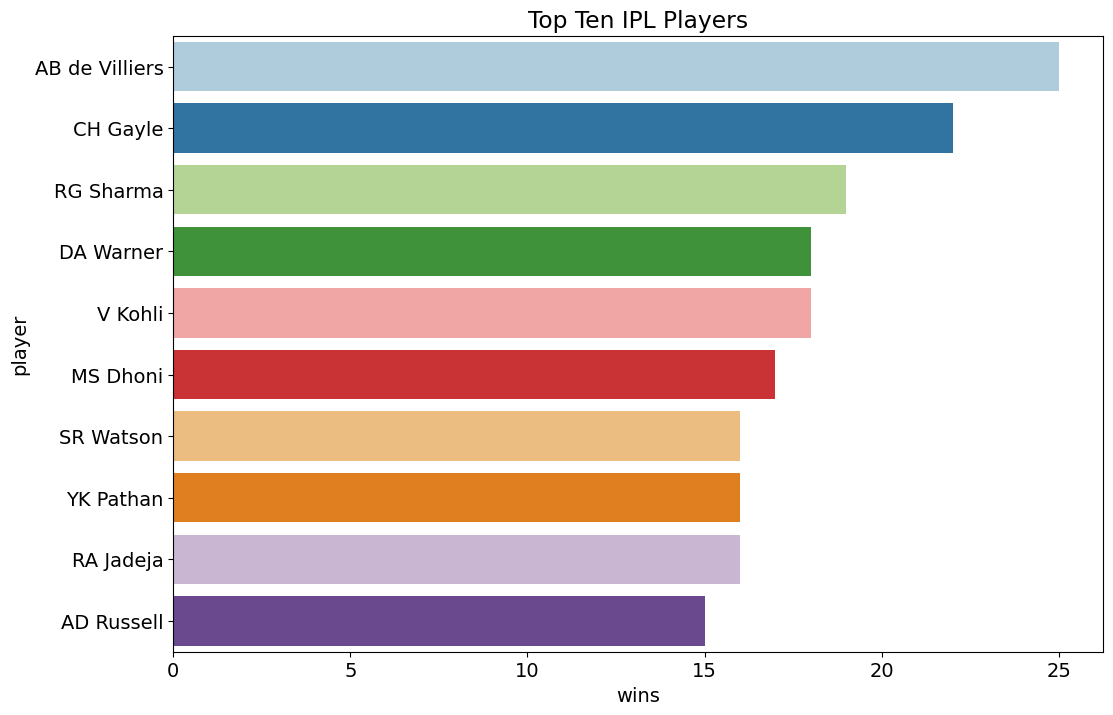

In [38]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired');

### Observations:

* AB de Villiers is the player who won the most player of the match awards and hence is the most valuable player.
* Five Indian players have figured in the top ten IPL players list.

## The team that won the most number of toss

In [39]:
toss_ser = ipl_matches_df['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.items():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = pd.concat([toss_df, temp_df3], ignore_index=True) # Use concat instead of append

In [40]:
toss_df

,team,wins
0,Mumbai Indians,143
1,Kolkata Knight Riders,122
2,Chennai Super Kings,122
3,Rajasthan Royals,120
4,Royal Challengers Bangalore,113
5,Sunrisers Hyderabad,88
6,Kings XI Punjab,85
7,Delhi Daredevils,80
8,Delhi Capitals,50
9,Deccan Chargers,43


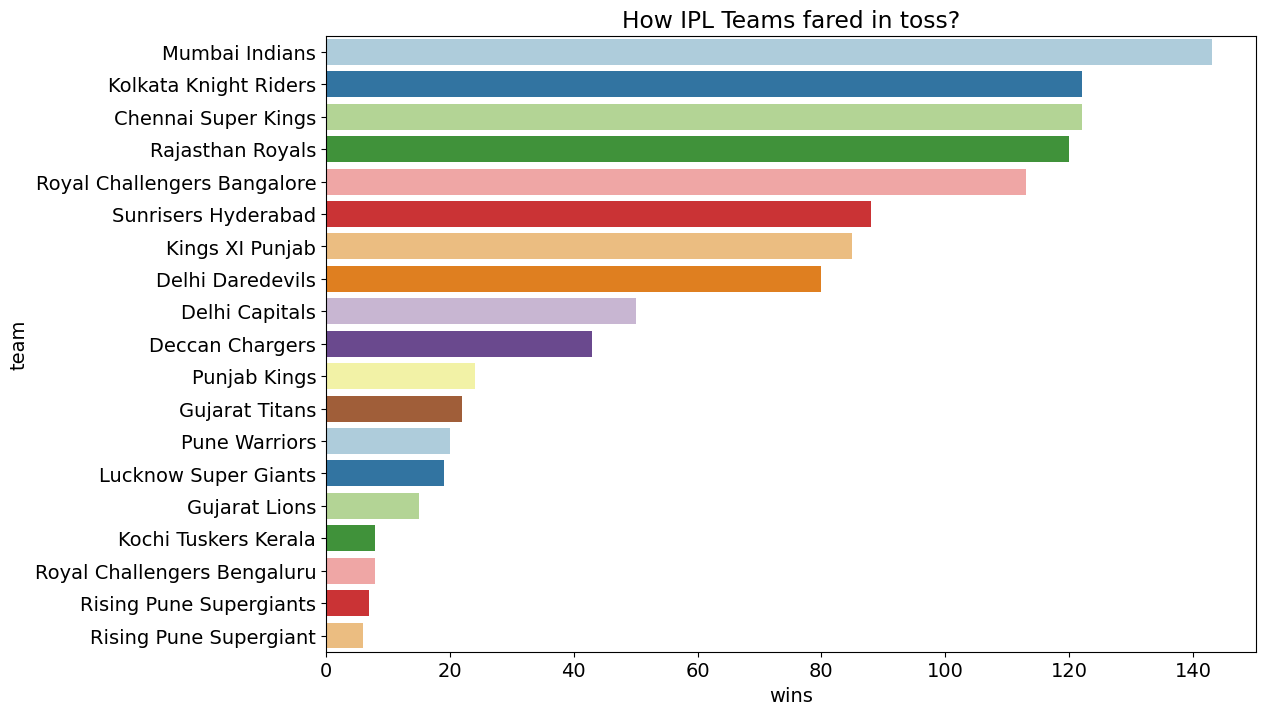

In [41]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

### Observations:

* Mumbai Indians has won the most toss(till 2024) in IPL history.
* All the top teams in IPL are successful in winning the toss as well.

## Asking and Answering Questions

Let’s try to find answers to the questions that will linger in an IPL fan’s mind. In Part I, we are dealing with some very basic questions. In Part II, we will delve deeper.

**Q1: Does the presence of the most valuable players in a team ensures the IPL trophy?**

We have figured out the top ten players of IPL using the ‘Player of the Match’ title as the yardstick. It is interesting to note that the top two players — AB de Villers and Chris Gayle have never won an IPL. **Of the top ten players, 7 players(RG Sharma, DA Warner, MS Dhoni, SR Watson, YK Pathan, RA Jadeja and AD Russell) have won the IPL.** It exemplifies the importance of the presence of the most valuable player(s) in a team.

In [42]:
mvp_ten_df

,player,wins
0,AB de Villiers,25
1,CH Gayle,22
2,RG Sharma,19
3,DA Warner,18
4,V Kohli,18
5,MS Dhoni,17
6,SR Watson,16
7,YK Pathan,16
8,RA Jadeja,16
9,AD Russell,15


**Q2: Which umpire has officiated the most number of IPL matches on-field?**

In [43]:
umpire1_ser = ipl_matches_df['umpire1'].value_counts()
umpire2_ser = ipl_matches_df['umpire2'].value_counts()

In [44]:
umpires_df = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df

,count,count
AK Chaudhary,115.0,16.0
HDPK Dharmasena,79.0,19.0
KN Ananthapadmanabhan,59.0,13.0
CB Gaffaney,53.0,24.0
Asad Rauf,51.0,NaN
...,...,...
N Pandit,NaN,6.0
GA Pratapkumar,NaN,6.0
TH Wijewardene,NaN,5.0
SD Ranade,NaN,2.0


In [45]:
umpire_df = pd.DataFrame(ipl_matches_df['umpire1'].value_counts() + ipl_matches_df['umpire2'].value_counts()).reset_index()
umpire_df.columns = ['umpire', 'matches']

In [46]:
umpire_df.sort_values('matches', ascending=False).head()

,umpire,matches
4,AK Chaudhary,131.0
54,S Ravi,131.0
43,Nitin Menon,104.0
24,HDPK Dharmasena,98.0
15,C Shamshuddin,88.0


**AK Chaudhary and S. Ravi(Sundaram Ravi) both has officiated the most number of IPL matches on-field**, followed by **Nitin Menon**.

**Q3: Which team is the most successful team in IPL?**

Nothing succeeds like success. In a game of cricket, winning is everything. We have narrowed down on the list of teams that made the most number of wins in each season. The DataFrame win_per_season_df gives the required information. Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019). Mumbai Indians won the IPL trophy in 2013, 2015, 2017, 2019 and 2020.

In [47]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
1,2009,Delhi Daredevils,10
2,2010,Mumbai Indians,11
3,2011,Chennai Super Kings,11
4,2012,Kolkata Knight Riders,12
5,2013,Mumbai Indians,13
6,2014,Kings XI Punjab,12
7,2015,Chennai Super Kings,10
8,2016,Sunrisers Hyderabad,11
9,2017,Mumbai Indians,12


Mumbai Indians secured the most number of wins(144) in IPL, followed by Chennai Super Kings.

In [48]:
team_wins_df

,team,wins
0,Mumbai Indians,144
1,Chennai Super Kings,138
2,Kolkata Knight Riders,131
3,Royal Challengers Bangalore,116
4,Rajasthan Royals,112
5,Kings XI Punjab,88
6,Sunrisers Hyderabad,88
7,Delhi Daredevils,67
8,Delhi Capitals,48
9,Deccan Chargers,29


Of all the IPL matches played till 2024, Mumbai Indians has emerged victorious in the most number of games. They have secured most wins in four seasons and have won five IPL trophies so far. **Hence Mumbai Indians is the most successful team in IPL.**

**Q4: Which city has hosted the maximum number of IPL matches?**

In [49]:
ipl_matches_df['city'].value_counts()

,count
city,
Mumbai,173
Kolkata,93
Delhi,90
Chennai,85
Hyderabad,77
Bangalore,65
Chandigarh,61
Jaipur,57
Pune,51


In [54]:
city_ser = ipl_matches_df['city'].value_counts()

In [55]:
city_df = pd.DataFrame(city_ser).reset_index()
city_df.columns = ['city', 'matches']

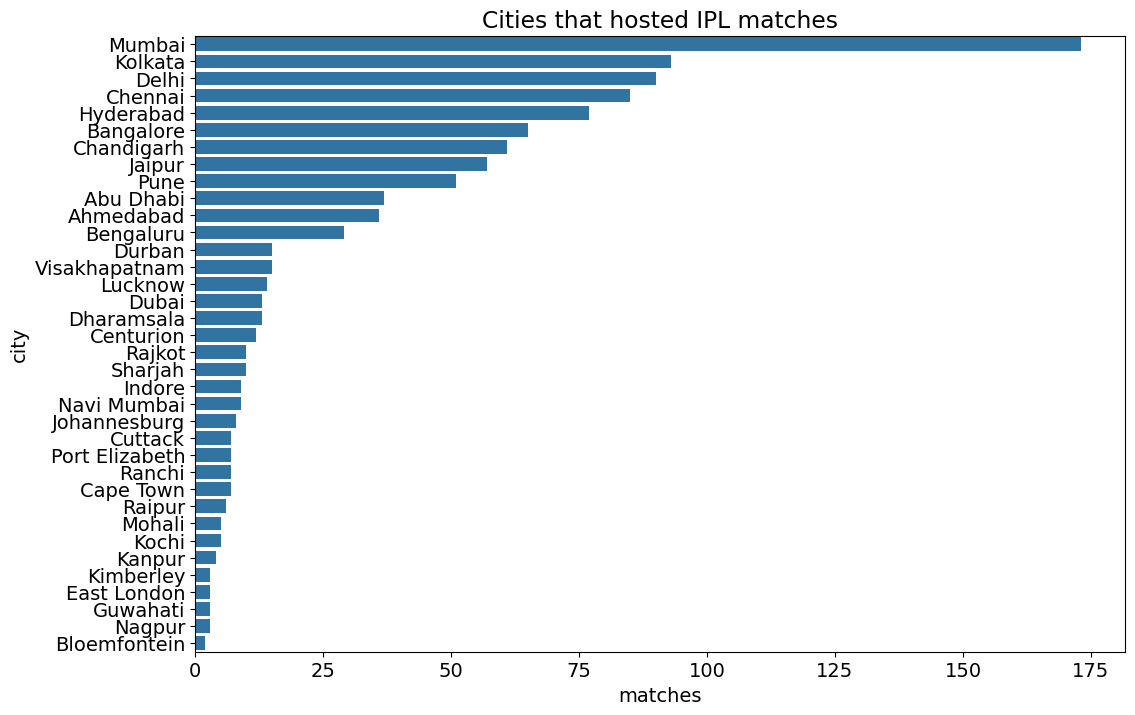

In [56]:
plt.title("Cities that hosted IPL matches")
sns.barplot(x='matches', y='city', data=city_df);

In [57]:
city_df

,city,matches
0,Mumbai,173
1,Kolkata,93
2,Delhi,90
3,Chennai,85
4,Hyderabad,77
5,Bangalore,65
6,Chandigarh,61
7,Jaipur,57
8,Pune,51
9,Abu Dhabi,37


The city of Mumbai has hosted the maximum number of IPL matches.

**Q5: Does winning the toss has any advantage?**

In [58]:
win_count = 0
for index, value in ipl_matches_df.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(ipl_matches_df)
print('The probability of winning if won the toss: {:.2f}' .format(prob))

The number of times the team winning toss have won: 554
The probability of winning if won the toss: 0.51


**The probability of winning when the team had won the toss is 51%.** So winning toss gives a slight edge over the opponent. However, it would be naive to term winning the toss as a greater advantage as there were 541 instances when the team losing the toss has won the game.

**Q6: What are the major victories in IPL? Is it better to defend or chase in IPL?**

In [59]:
len(ipl_matches_df)

1095

In [60]:
defend_vict_ser = ipl_matches_df['win_by_runs'].value_counts()
defend_vict_ser.sort_values(ascending=True)

,count
win_by_runs,
106,1
91,1
88,1
146,1
112,1
...,...
4,15
7,15
14,16


* Of the 1095 IPL matches played from 2008 to 2024, **597 matches were won chasing the target. Hence, more victories were registered by teams chasing a total(batting second) than defending the total.**

* **When defending a total, the biggest victory was by 146 runs.** Let’s find out that particular match.

In [63]:
score = 146
for index, row in ipl_matches_df.iterrows():
    if(row['win_by_runs'] == score):
        print(row)

id                          1082635
season                         2017
city                          Delhi
date                     2017-05-06
match_type                   League
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
team1              Delhi Daredevils
team2                Mumbai Indians
toss_winner        Delhi Daredevils
toss_decision                 field
winner               Mumbai Indians
target_runs                   213.0
target_overs                   20.0
super_over                        N
umpire1                 Nitin Menon
umpire2                   CK Nandan
win_by_runs                     146
win_by_wickets                    0
Name: 620, dtype: object


**The greatest victory in IPL on defending a total is for Mumbai Indians when they defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi.**

In [64]:
chasing_vict_ser = ipl_matches_df['win_by_wickets'].value_counts()
chasing_vict_ser

,count
win_by_wickets,
0,517
6,120
7,115
5,97
8,78
4,59
9,48
3,31
10,16


* Of the 756 IPL matches played from 2008 to 2019, **517 matches were won defending the total.**

* When chasing a target, **the biggest victory was by 10 wickets**(without losing any wickets). There were 16 such instances and we can find the details about those matches by the following code snippet:

In [67]:
for index, row in ipl_matches_df.iterrows():
    if(row['win_by_wickets'] == 10):
        print(row)

id                                     335994
season                                   2008
city                                   Mumbai
date                               2008-04-27
match_type                             League
player_of_match                  AC Gilchrist
venue              Dr DY Patil Sports Academy
team1                          Mumbai Indians
team2                         Deccan Chargers
toss_winner                   Deccan Chargers
toss_decision                           field
winner                        Deccan Chargers
target_runs                             155.0
target_overs                             20.0
super_over                                  N
umpire1                             Asad Rauf
umpire2                            SL Shastri
win_by_runs                                 0
win_by_wickets                             10
Name: 12, dtype: object
id                           392183
season                         2009
city                      Cape

In [68]:
chasing_vict_df = pd.DataFrame(chasing_vict_ser).reset_index()
chasing_vict_df.columns = ['victory_margin', 'instances']
chasing_vict_df = chasing_vict_df[chasing_vict_df['victory_margin'] != 0]

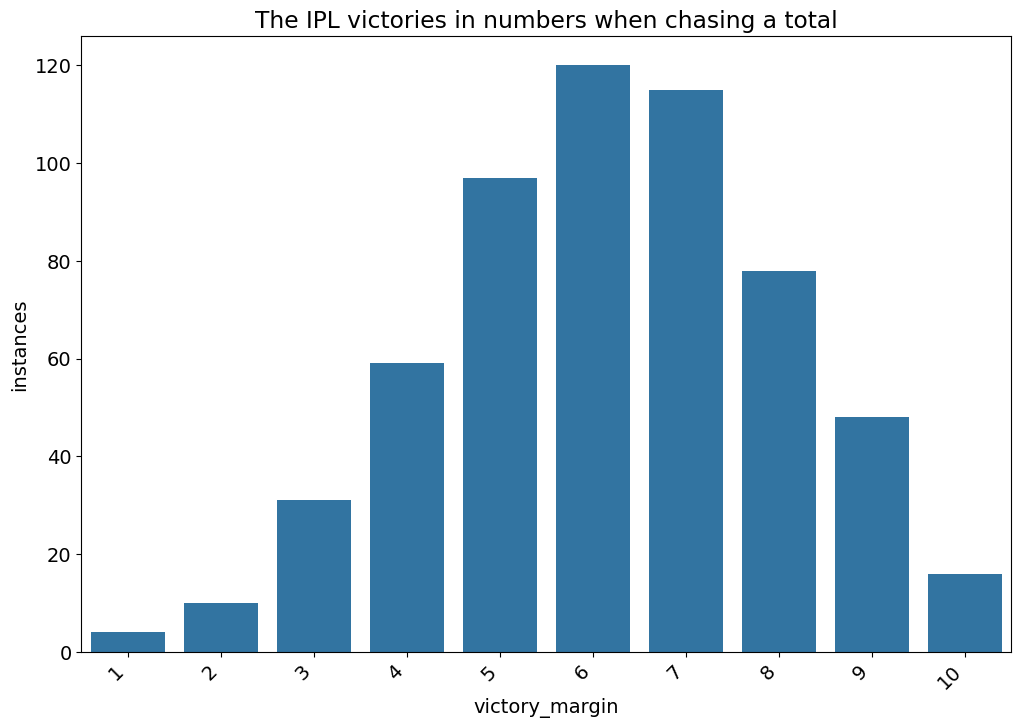

In [69]:
# Sort the dataframe by victory_margin
chasing_vict_df = chasing_vict_df.sort_values('victory_margin')

plt.title('The IPL victories in numbers when chasing a total')
sns.barplot(x='victory_margin', y='instances', data=chasing_vict_df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## Inferences and Conclusion

Let’s summarize the important observations we made during Exploratory Data Analysis:

* Mumbai Indians is the most successful team in IPL.
* Mumbai Indians has won the most number of toss.
* There were more matches won by chasing the total(597 matches) than defending(517 matches).
* When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).
* When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances.
* The Mumbai city has hosted the most number of IPL matches.
* AB de Villiers has won the maximum number of player of the match title.
* Winning toss gives a slight edge(51% probability of winning) against the opponents.
* Five Indian players have figured in the top ten IPL players list.
* AK Chaudhary and S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field.
* Eden Gardens has hosted the maximum number of IPL matches.
* Till 2024, 57 venues have hosted 1095 IPL matches.